# SQL QUERY

In [ ]:
# WITH TransfersPerDay AS (
#   SELECT
#     from_address,
#     token_address,
#     block_timestamp
#   FROM
#    bigquery-public-data.crypto_ethereum.token_transfers
#   WHERE
#     block_timestamp >= '2024-06-01 00:00:00 UTC'
#   AND from_address NOT IN (
#     SELECT address
#     FROM
#       bigquery-public-data.crypto_ethereum.contracts
#   )
# ),
# TransactionsPerAddressToken AS (
#   SELECT
#     from_address,
#     token_address,
#     ARRAY_AGG(DISTINCT block_timestamp ORDER BY block_timestamp ASC) AS block_timestamps
#   FROM
#   TransfersPerDay
#   GROUP BY
#     from_address,
#     token_address
# )
# SELECT
#   *
# FROM
#   TransactionsPerAddressToken
# ORDER BY
#   from_address, token_address ;

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Fichiers/2.Scolarité/1. Jedha_Data_Science/PROJETS/DEMO_DAY/Dataset_src_02/2023-01-15___2023_02-01.csv")
df = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\PROJETS\DEMO_DAY\Dataset_src_02\2023-01-15___2023_02-01.csv")

In [ ]:
df

,timestamp,wallet_address,token_address,balance
0,2023-01-19,0xeec9a835df1298587348b5c01048aac2277f340a,0xfe5a28f19934851695783a0c8ccb25d678bb05d3,3.993000e-11
1,2023-01-19,0xeea18c07617cedac2762361231bb908e8b05b17f,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,5.129000e-05
2,2023-01-19,0x3b3fc1f418bef741a954403e5c6cce50df4349e9,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,1.501998e-05
3,2023-01-19,0xb5bbffd7d19e0ed0e4e29f86fb6c70a8379666d4,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.037005e-05
4,2023-01-19,0x1ea014d19b2be0411c996842486420250fb7c9aa,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.073201e-04
...,...,...,...,...
6700654,2023-01-23,0xef843bea95ec79e73b2493770b56fe96139d9b57,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-9.597521e+02
6700655,2023-01-23,0x56d181d06d80592da8be947fb0ddd40a816e4fdc,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.054467e+03
6700656,2023-01-23,0xaf162bf5c9a8413a8628e630f961273d7f3270ab,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.047172e+03
6700657,2023-01-23,0x7a84078b1813251430e92051cbb615a313378888,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.044350e+03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700659 entries, 0 to 6700658
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   timestamp       object 
 1   wallet_address  object 
 2   token_address   object 
 3   balance         float64
dtypes: float64(1), object(3)
memory usage: 204.5+ MB


In [ ]:
df["token_address"].value_counts()

token_address
0xdac17f958d2ee523a2206206994597c13d831ec7    1077505
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48     498756
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2     201486
0x514910771af9ca656af840dff83e8264ecf986ca     114706
0xdc09ef6ba2a135b350d3d05c409497485d8b0a00     112453
                                               ...   
0xef53b5ba2afb19a8d89ce93b8122d43145932c2a          1
0x805f78d21804bb519a6f2a3d349bed98f9de4fef          1
0xfeabf506f8fcd147d3ed65cc81b82ef87d85df96          1
0xdbd0ff2954abc725336a1b60f6c0a2341703bbdf          1
0x0968c90198f08b67365840fa37631b29fe2aa9fc          1
Name: count, Length: 56610, dtype: int64

In [ ]:
print(df["token_address"].nunique())
print((df["token_address"].value_counts()>=100).sum())

56610
5336


In [ ]:
print(df["wallet_address"].nunique())
print((df["wallet_address"].value_counts()>=100).sum())


2328444
1364


In [ ]:
print(df.isnull().sum())

timestamp         0
wallet_address    0
token_address     0
balance           0
dtype: int64


# PREPROCESS_v1_feature_eng

In [ ]:
dataset = df.copy()

In [ ]:
# dataset = dataset.sample(n=500000)

In [ ]:
dataset['wallet_address'] = dataset['wallet_address'].astype(str)
dataset['token_address'] = dataset['token_address'].astype(str)
dataset["day"] = pd.to_datetime(dataset['timestamp'],format='%Y-%m-%d')
dataset['month'] = pd.to_datetime(dataset['timestamp']).dt.month
dataset['day_of_week'] = pd.to_datetime(dataset['timestamp']).dt.dayofweek

In [ ]:
dataset

,timestamp,wallet_address,token_address,balance,day,month,day_of_week
0,2023-01-19,0xeec9a835df1298587348b5c01048aac2277f340a,0xfe5a28f19934851695783a0c8ccb25d678bb05d3,3.993000e-11,2023-01-19,1,3
1,2023-01-19,0xeea18c07617cedac2762361231bb908e8b05b17f,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,5.129000e-05,2023-01-19,1,3
2,2023-01-19,0x3b3fc1f418bef741a954403e5c6cce50df4349e9,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,1.501998e-05,2023-01-19,1,3
3,2023-01-19,0xb5bbffd7d19e0ed0e4e29f86fb6c70a8379666d4,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.037005e-05,2023-01-19,1,3
4,2023-01-19,0x1ea014d19b2be0411c996842486420250fb7c9aa,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.073201e-04,2023-01-19,1,3
...,...,...,...,...,...,...,...
6700654,2023-01-23,0xef843bea95ec79e73b2493770b56fe96139d9b57,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-9.597521e+02,2023-01-23,1,0
6700655,2023-01-23,0x56d181d06d80592da8be947fb0ddd40a816e4fdc,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.054467e+03,2023-01-23,1,0
6700656,2023-01-23,0xaf162bf5c9a8413a8628e630f961273d7f3270ab,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.047172e+03,2023-01-23,1,0
6700657,2023-01-23,0x7a84078b1813251430e92051cbb615a313378888,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.044350e+03,2023-01-23,1,0


In [ ]:
dataset = dataset.drop(columns = "timestamp")

### Total_transaction

In [ ]:
total_transaction_df = dataset.groupby('wallet_address').size().to_frame(name='total_wallet_transactions')
# total_transaction_df = total_transaction_df.reset_index()
print(total_transaction_df.index.nunique())
print(total_transaction_df["total_wallet_transactions"].nunique())
print(total_transaction_df)

2328444
431
                                            total_wallet_transactions
wallet_address                                                       
0x0000000000000000000000000000000000000000                      82117
0x0000000000000000000000000000000000000001                        115
0x0000000000000000000000000000000000000002                          8
0x0000000000000000000000000000000000000003                          5
0x0000000000000000000000000000000000000004                          5
...                                                               ...
0xffffff46eeb8b840e2254d1fa9b1de6a17ce88ff                          4
0xffffff5800b709071d4adc74759ae4b89bef2a9d                          1
0xffffffff5c1f4a12c4552073e8d90f3a391bf7cc                          2
0xffffffff7a5cb56bbccb9dfaff17bb2b26a3d71c                         20
0xffffffffffffffffffffffffffffffffffffffff                          1

[2328444 rows x 1 columns]


In [ ]:
total_transaction_df['total_wallet_transactions'].value_counts(ascending=False)

total_wallet_transactions
1       1375808
2        405183
3        167252
4         96262
5         60351
         ...   
1089          1
220           1
305           1
501           1
450           1
Name: count, Length: 431, dtype: int64

In [ ]:
total_transaction_df['log_total_wallet_transactions'] = np.log1p(total_transaction_df['total_wallet_transactions'])

In [ ]:
unique_tokens_by_wallet = dataset.groupby('wallet_address')['token_address'].nunique()
u_token_df = unique_tokens_by_wallet.to_frame(name='tokens_by_wallet')
# u_token_df = u_token_df.reset_index()
print(u_token_df.index.nunique())
print(u_token_df["tokens_by_wallet"].nunique())

2328444
241


In [ ]:
u_token_df

,tokens_by_wallet
wallet_address,
0x0000000000000000000000000000000000000000,31387
0x0000000000000000000000000000000000000001,40
0x0000000000000000000000000000000000000002,7
0x0000000000000000000000000000000000000003,5
0x0000000000000000000000000000000000000004,5
...,...
0xffffff46eeb8b840e2254d1fa9b1de6a17ce88ff,2
0xffffff5800b709071d4adc74759ae4b89bef2a9d,1
0xffffffff5c1f4a12c4552073e8d90f3a391bf7cc,2


In [ ]:
u_token_df['tokens_by_wallet'].value_counts(ascending=False)

tokens_by_wallet
1      1698640
2       296949
3       115041
4        61662
5        38103
        ...   
355          1
202          1
189          1
339          1
564          1
Name: count, Length: 241, dtype: int64

In [ ]:
u_token_df['log_tokens_by_wallet'] = np.log1p(u_token_df['tokens_by_wallet'])

########################Model_Training#####################

## K-Means_Test_1

In [ ]:
dataset_kmeans_1 = pd.concat([total_transaction_df, u_token_df], axis=1)

In [ ]:
dataset_kmeans_1

,total_wallet_transactions,log_total_wallet_transactions,tokens_by_wallet,log_tokens_by_wallet
wallet_address,,,,
0x0000000000000000000000000000000000000000,82117,11.315913,31387,10.354181
0x0000000000000000000000000000000000000001,115,4.753590,40,3.713572
0x0000000000000000000000000000000000000002,8,2.197225,7,2.079442
0x0000000000000000000000000000000000000003,5,1.791759,5,1.791759
0x0000000000000000000000000000000000000004,5,1.791759,5,1.791759
...,...,...,...,...
0xffffff46eeb8b840e2254d1fa9b1de6a17ce88ff,4,1.609438,2,1.098612
0xffffff5800b709071d4adc74759ae4b89bef2a9d,1,0.693147,1,0.693147
0xffffffff5c1f4a12c4552073e8d90f3a391bf7cc,2,1.098612,2,1.098612


In [ ]:
dataset_kmeans_1 = dataset_kmeans_1.drop(columns = ["total_wallet_transactions","tokens_by_wallet"],axis = 1)

In [ ]:
dataset_kmeans_1.info()
print(dataset_kmeans_1["log_total_wallet_transactions"].nunique())
print(dataset_kmeans_1["log_tokens_by_wallet"].nunique())
# print(dataset_kmeans_1["day_of_week_sin"].nunique())
# print(dataset_kmeans_1["day_of_week_cos"].nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 2328444 entries, 0x0000000000000000000000000000000000000000 to 0xffffffffffffffffffffffffffffffffffffffff
Data columns (total 2 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   log_total_wallet_transactions  float64
 1   log_tokens_by_wallet           float64
dtypes: float64(2)
memory usage: 117.8+ MB
431
241


In [ ]:
numerical_features = dataset_kmeans_1[["log_total_wallet_transactions","log_tokens_by_wallet"]]
scaler = StandardScaler()
standardized_features = scaler.fit_transform(dataset_kmeans_1)

In [ ]:
dataset_kmeans_1

,log_total_wallet_transactions,log_tokens_by_wallet
wallet_address,,
0x0000000000000000000000000000000000000000,11.315913,10.354181
0x0000000000000000000000000000000000000001,4.753590,3.713572
0x0000000000000000000000000000000000000002,2.197225,2.079442
0x0000000000000000000000000000000000000003,1.791759,1.791759
0x0000000000000000000000000000000000000004,1.791759,1.791759
...,...,...
0xffffff46eeb8b840e2254d1fa9b1de6a17ce88ff,1.609438,1.098612
0xffffff5800b709071d4adc74759ae4b89bef2a9d,0.693147,0.693147
0xffffffff5c1f4a12c4552073e8d90f3a391bf7cc,1.098612,1.098612


In [ ]:
wcss =  []
k = []

for i in range (2,12):
    kmeans = KMeans(n_clusters= i, random_state = 0, n_init = 25)
    kmeans.fit(dataset_kmeans_1)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 450696.2640363008
WCSS for K=3 --> 249691.50607659286
WCSS for K=4 --> 165286.97327735828
WCSS for K=5 --> 124853.9220935237
WCSS for K=6 --> 97808.372962754
WCSS for K=7 --> 74030.44046949381
WCSS for K=8 --> 60124.172708338374
WCSS for K=9 --> 51397.897463717665
WCSS for K=10 --> 42892.10685625804
WCSS for K=11 --> 37922.61139805932


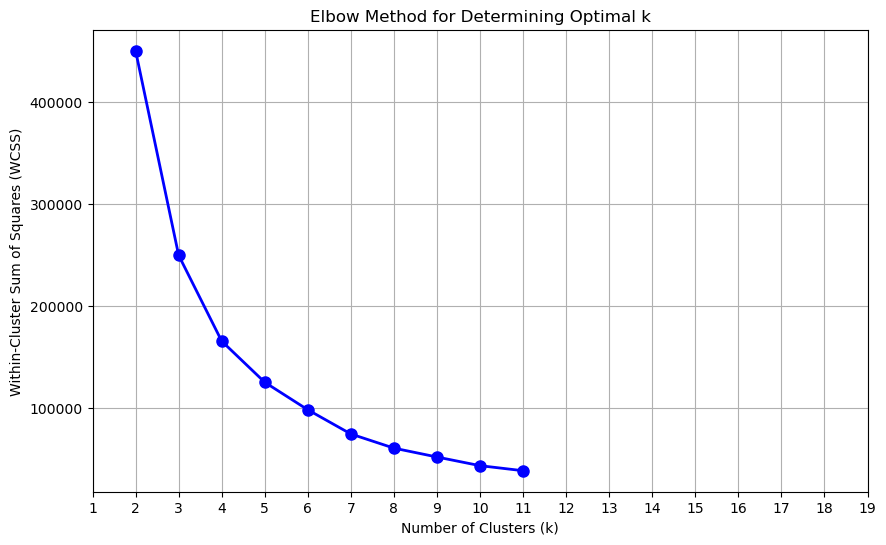

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k, wcss, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal k')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0)

In [ ]:
kmeans.fit(dataset_kmeans_1)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [ ]:
dataset_kmeans_1.shape
dataset_kmeans_1['cluster_label_kmeans'] = kmeans.labels_
dataset_kmeans_1["cluster_label_kmeans"].value_counts()

cluster_label_kmeans
2    1375808
0     330977
4     286578
3     157991
1      81880
5      69541
6      25669
Name: count, dtype: int64

In [ ]:
dataset_kmeans_1.columns

Index(['log_total_wallet_transactions', 'log_tokens_by_wallet',
       'cluster_label_kmeans'],
      dtype='object')

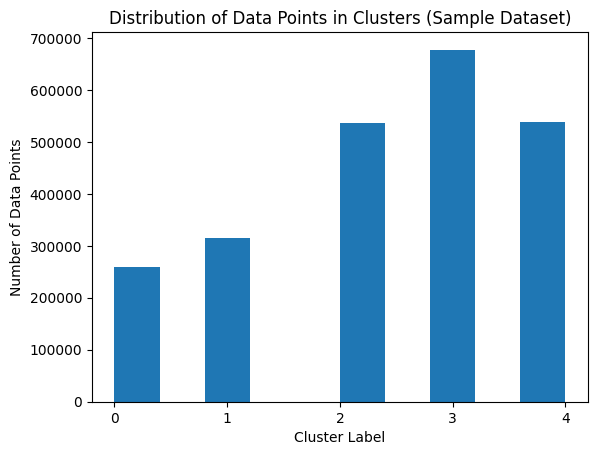

In [ ]:
plt.hist(dataset_kmeans_1["cluster_label"])
plt.xticks(range(dataset_kmeans_1["cluster_label"].max() + 1))
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Data Points in Clusters (Sample Dataset)")
plt.show()